In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Chargement du CSV
df = pd.read_csv("data_cleaned.csv")
df.head()

,Region,Year,Indicator,Value_Millions,Penetration_Per_100_Inhabitants,Percentage,Value_Exabytes,Per_Subscription_GB,Value_Tbits,Per_User_kbits
0,Africa,2005,Fixed-telephone subscriptions,10.0,1.5,NaN,NaN,NaN,NaN,NaN
1,Africa,2006,Fixed-telephone subscriptions,11.0,1.5,NaN,NaN,NaN,NaN,NaN
2,Africa,2007,Fixed-telephone subscriptions,11.0,1.5,NaN,NaN,NaN,NaN,NaN
3,Africa,2008,Fixed-telephone subscriptions,12.0,1.5,NaN,NaN,NaN,NaN,NaN
4,Africa,2009,Fixed-telephone subscriptions,13.0,1.6,NaN,NaN,NaN,NaN,NaN


In [2]:
print(df.info())
print(df['Region'].unique())
print(df['Indicator'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Region                           1560 non-null   object 
 1   Year                             1560 non-null   int64  
 2   Indicator                        1560 non-null   object 
 3   Value_Millions                   906 non-null    float64
 4   Penetration_Per_100_Inhabitants  450 non-null    float64
 5   Percentage                       456 non-null    float64
 6   Value_Exabytes                   72 non-null     float64
 7   Per_Subscription_GB              72 non-null     float64
 8   Value_Tbits                      60 non-null     float64
 9   Per_User_kbits                   50 non-null     float64
dtypes: float64(7), int64(1), object(2)
memory usage: 122.0+ KB
None
['Africa' 'Americas' 'Arab States' 'Asia-Pacific' 'CIS' 'Europe']
['Fixed-teleph

In [3]:
# Liste des colonnes numériques d’intérêt
numeric_cols = [
    "Value_Millions",
    "Penetration_Per_100_Inhabitants",
    "Percentage",
    "Value_Exabytes",
    "Per_Subscription_GB",
    "Value_Tbits",
    "Per_User_kbits",
]

# Réorganisation en format WIDE: Region × Year → indicateurs en colonnes
df_wide = df.pivot_table(
    index=["Region", "Year"],
    columns="Indicator",
    values=numeric_cols,
    aggfunc="mean"
).reset_index()

display(df_wide.head())
df_wide.info()

Region  Year       Penetration_Per_100_Inhabitants  \
Indicator               Active mobile-broadband subscriptions   
0          Africa  2005                                   NaN   
1          Africa  2006                                   NaN   
2          Africa  2007                                   NaN   
3          Africa  2008                                   NaN   
4          Africa  2009                                   NaN   

                                                                       \
Indicator Fixed-broadband subscriptions Fixed-telephone subscriptions   
0                                   0.0                           1.5   
1                                   0.1                           1.5   
2                                   0.1                           1.5   
3                                   0.1                           1.5   
4                                   0.1                           1.6   

                                                      Per_Subscription_GB  \
Indicator Mobile-cellular telephone subscriptions Fixed broadband traffic   
0                                            12.4                     NaN   
1                                            17.8                     NaN   
2                                            23.5                     NaN   
3                                            32.2                     NaN   
4                                            38.0                     NaN   

                                                  Per_User_kbits  \
Indicator Mobile broadband traffic International bandwidth usage   
0                              NaN                           NaN   
1                              NaN                           NaN   
2                              NaN                           NaN   
3                              NaN                           NaN   
4                              NaN                           NaN   

                                 Percentage  ...  \
Indicator Individuals owning a mobile phone  ...   
0                                       NaN  ...   
1                                       NaN  ...   
2                                       NaN  ...   
3                                       NaN  ...   
4                                       NaN  ...   

                         Value_Millions                                \
Indicator Fixed-broadband subscriptions Fixed-telephone subscriptions   
0                                   0.0                          10.0   
1                                   1.0                          11.0   
2                                   1.0                          11.0   
3                                   1.0                          12.0   
4                                   1.0                          13.0   

                                                                            \
Indicator Individuals owning a mobile phone Individuals using the Internet   
0                                       NaN                           15.0   
1                                       NaN                           20.0   
2                                       NaN                           25.0   
3                                       NaN                           29.0   
4                                       NaN                           36.0   

                                                   \
Indicator Mobile-cellular telephone subscriptions   
0                                            87.0   
1                                           129.0   
2                                           174.0   
3                                           246.0   
4                                           299.0   

                                                           \
Indicator Population covered by a mobile-cellular network   
0                                                   375.0   
1                                              

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 28 columns):
 #   Column                                                                        Non-Null Count  Dtype  
---  ------                                                                        --------------  -----  
 0   (Region, )                                                                    120 non-null    object 
 1   (Year, )                                                                      120 non-null    int64  
 2   (Penetration_Per_100_Inhabitants, Active mobile-broadband subscriptions)      90 non-null     float64
 3   (Penetration_Per_100_Inhabitants, Fixed-broadband subscriptions)              120 non-null    float64
 4   (Penetration_Per_100_Inhabitants, Fixed-telephone subscriptions)              120 non-null    float64
 5   (Penetration_Per_100_Inhabitants, Mobile-cellular telephone subscriptions)    120 non-null    float64
 6   (Per_Subscription_GB, Fixed broadb

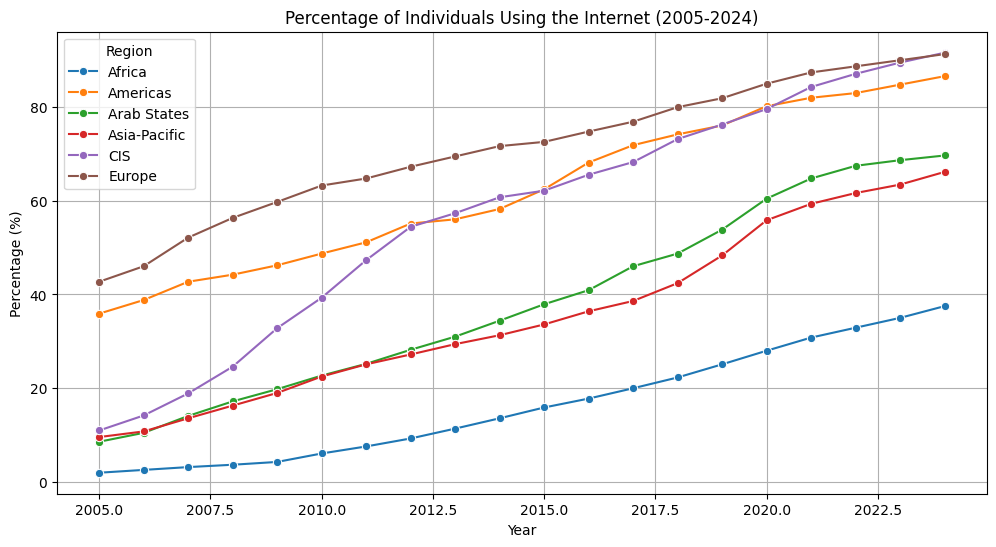

In [4]:
# Filtrage de l'indicateur 'Individuals using the Internet' (utilisation d'Internet en %)
df_internet = df[df['Indicator'] == 'Individuals using the Internet']
# Visualisation de l'évolution de l'utilisation d'Internet par région
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_internet, x='Year', y='Percentage', hue='Region', marker='o')
plt.title('Percentage of Individuals Using the Internet (2005-2024)')
plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.legend(title='Region')
plt.grid(True)
plt.show()

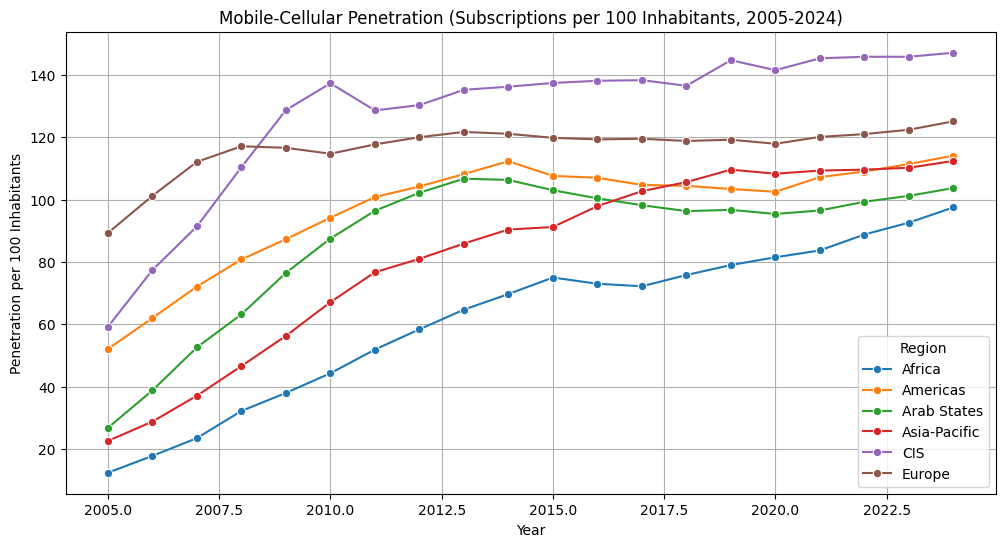

In [5]:
# Filtrage de l'indicateur 'Mobile-cellular telephone subscriptions' (pénétration mobile)
df_mobile = df[df['Indicator'] == 'Mobile-cellular telephone subscriptions']

    # Plot time series pour la pénétration mobile (par 100 habitants)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_mobile, x='Year', y='Penetration_Per_100_Inhabitants', hue='Region', marker='o')
plt.title('Mobile-Cellular Penetration (Subscriptions per 100 Inhabitants, 2005-2024)')
plt.xlabel('Year')
plt.ylabel('Penetration per 100 Inhabitants')
plt.legend(title='Region')
plt.grid(True)
plt.show()

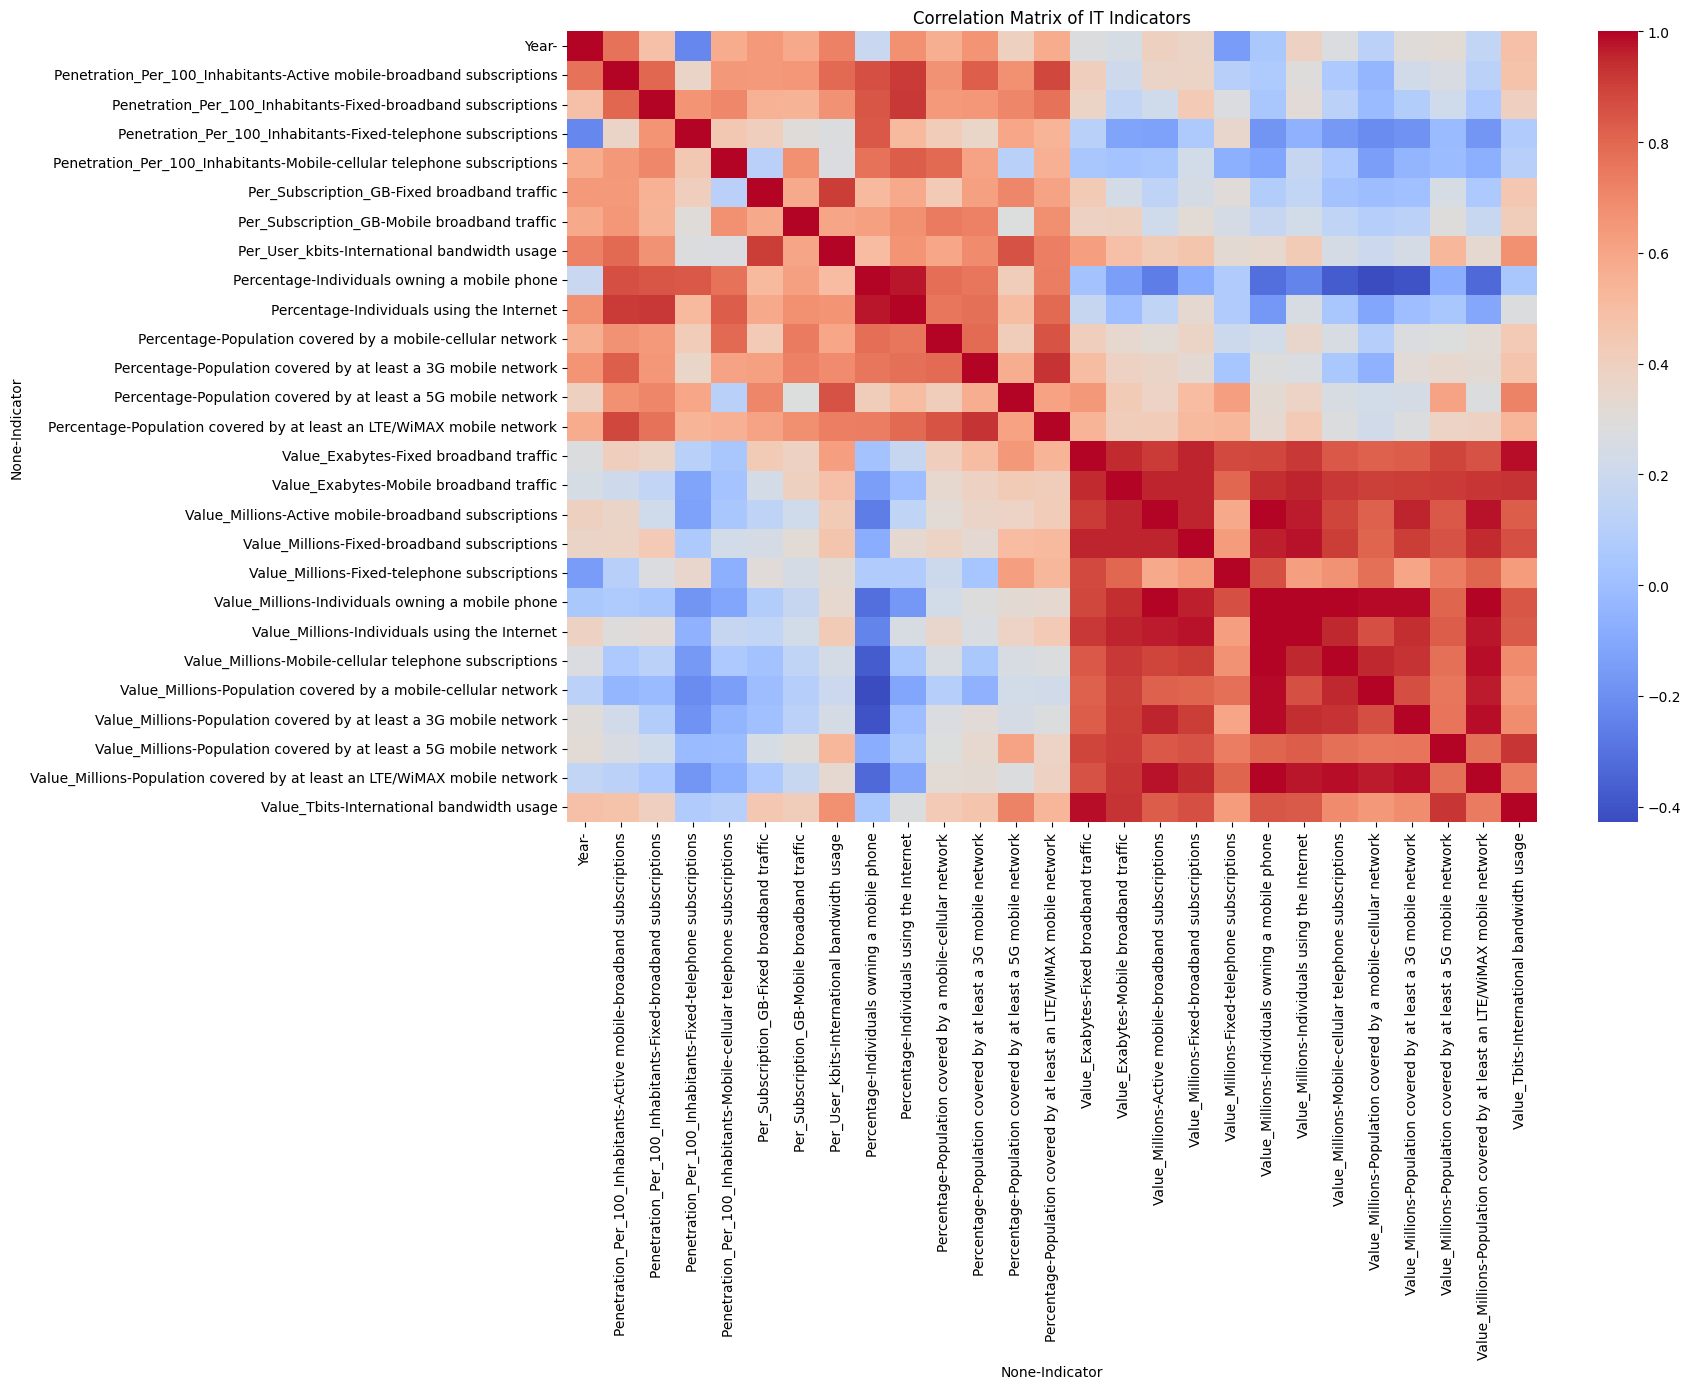

In [6]:
# Extraire uniquement les colonnes numériques pour corrélation
df_num = df_wide.select_dtypes(include="number")

# Matrice de corrélation
corr_matrix = df_num.corr()

# Affichage de la heatmap
plt.figure(figsize=(18, 14))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False)
plt.title("Correlation Matrix of IT Indicators")
plt.tight_layout()
plt.show()

La matrice de corrélation met en évidence trois ensembles d’indicateurs formant une structure claire du développement numérique. 

Un premier bloc, fortement corrélé, regroupe les infrastructures modernes (haut débit fixe et mobile, utilisation d’Internet, couverture 3G/4G/5G, trafic international), caractéristiques des régions les plus développées. 

Un second ensemble montre des corrélations intermédiaires autour de la pénétration mobile et des usages par abonnement, typiques des zones en transition numérique. 

Enfin, certains indicateurs plus basiques présentent des corrélations faibles ou négatives, révélant une dépendance à des technologies plus anciennes, situation fréquente dans les régions moins développées. L’ensemble confirme une relation nette entre le niveau d’équipement IT et le degré de développement d’une région, les indicateurs modernes progressant de manière cohérente dans les régions les plus avancées.

In [ ]:
# Pivot wide et simplification des colonnes multi-index
df_wide = df.pivot_table(index=['Region', 'Year'], 
                         columns='Indicator', 
                         values=['Value_Millions', 'Penetration_Per_100_Inhabitants', 'Percentage', 'Value_Exabytes', 'Per_Subscription_GB', 'Value_Tbits', 'Per_User_kbits'],
                         aggfunc='first')
df_wide.columns = ['_'.join(col).strip() for col in df_wide.columns.values]
df_wide = df_wide.reset_index()

# Filtrage des données récentes plus remplies (2015-2024)
df_recent = df_wide[df_wide['Year'] >= 2015].copy()

# Colonnes numériques
num_cols = df_recent.select_dtypes(include='number').columns

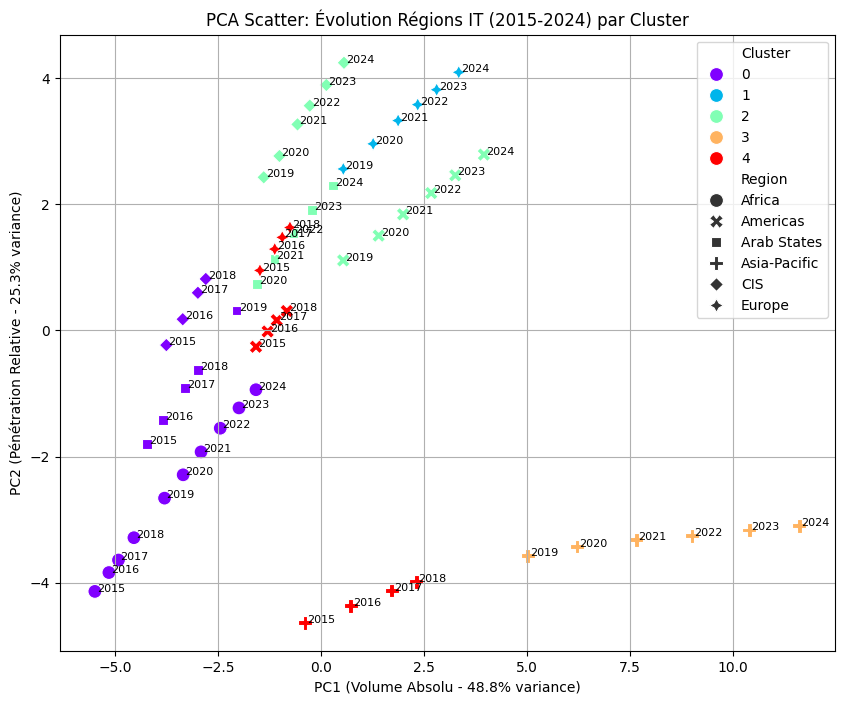

Cluster 0 top 5:


Year                                                                 2018.210526
Value_Millions_Population covered by a mobile-cellular network        668.368421
Value_Millions_Mobile-cellular telephone subscriptions                648.947368
Value_Millions_Population covered by at least a 3G mobile network     549.210526
Per_Subscription_GB_Fixed broadband traffic                           541.263158
Name: 0, dtype: float64

Cluster 1 top 5:


Per_Subscription_GB_Fixed broadband traffic               3309.666667
Year                                                      2021.500000
Value_Millions_Mobile-cellular telephone subscriptions     834.000000
Value_Exabytes_Fixed broadband traffic                     800.833333
Value_Millions_Active mobile-broadband subscriptions       726.500000
Name: 1, dtype: float64

Cluster 2 top 5:


Per_Subscription_GB_Fixed broadband traffic                       2950.823529
Year                                                              2021.647059
Value_Millions_Mobile-cellular telephone subscriptions             656.058824
Value_Millions_Active mobile-broadband subscriptions               587.823529
Value_Millions_Population covered by a mobile-cellular network     570.117647
Name: 2, dtype: float64

Cluster 3 top 5:


Value_Millions_Mobile-cellular telephone subscriptions                       4808.166667
Value_Millions_Population covered by a mobile-cellular network               4316.333333
Value_Millions_Population covered by at least a 3G mobile network            4239.166667
Value_Millions_Population covered by at least an LTE/WiMAX mobile network    4154.500000
Value_Millions_Active mobile-broadband subscriptions                         3727.000000
Name: 3, dtype: float64

Cluster 4 top 5:


Year                                                                         2016.500000
Value_Millions_Mobile-cellular telephone subscriptions                       2011.916667
Value_Millions_Population covered by a mobile-cellular network               1902.000000
Value_Millions_Population covered by at least a 3G mobile network            1757.250000
Value_Millions_Population covered by at least an LTE/WiMAX mobile network    1481.583333
Name: 4, dtype: float64

In [8]:
# On remplit les valeurs manquantes par 0 parce que l'évolution est toujours croissante avec le temps
imputer = SimpleImputer(strategy='constant', fill_value=0)
df_imputed = pd.DataFrame(imputer.fit_transform(df_recent[num_cols]), columns=num_cols, index=df_recent.index)

# Standardisation
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_imputed)

# Rechercher du nombre de cluster optimal (2-6)
sil_scores = [silhouette_score(df_scaled, KMeans(n_clusters=k, random_state=42).fit_predict(df_scaled)) for k in range(2, 6)]
best_k = range(2, 6)[sil_scores.index(max(sil_scores))]

# KMeans Clustering
kmeans = KMeans(n_clusters=best_k, random_state=42)
df_recent['Cluster'] = kmeans.fit_predict(df_scaled)

# Reduction de dimension avec PCA pour visualisation
pca = PCA(n_components=2)
df_pca = pd.DataFrame(pca.fit_transform(df_scaled), columns=['PC1', 'PC2'])
df_pca['Region'] = df_recent['Region'].values
df_pca['Year'] = df_recent['Year'].values
df_pca['Cluster'] = df_recent['Cluster'].values

# Visualisation des clusters en PCA
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Cluster', style='Region', palette='rainbow', s=100)
for i in range(len(df_pca)):
    plt.text(df_pca['PC1'][i] + 0.05, df_pca['PC2'][i], df_pca['Year'][i], fontsize=8)
plt.title('PCA Scatter: Évolution Régions IT (2015-2024) par Cluster')
plt.xlabel(f'PC1 (Volume Absolu - {pca.explained_variance_ratio_[0]*100:.1f}% variance)')
plt.ylabel(f'PC2 (Pénétration Relative - {pca.explained_variance_ratio_[1]*100:.1f}% variance)')
plt.grid(True)
plt.show()

# Interprétation des clusters via les centroids
centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=num_cols)
for i in range(best_k):
    print(f"Cluster {i} top 5:")
    display(centroids.iloc[i].sort_values(ascending=False).head(5))